In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [ ]:
'''
Készíts egy függvényt, betölti majd vissza adja az iris adathalmazt.


Egy példa a kimenetre: iris
return type: sklearn.utils.Bunch
függvény neve: load_iris_data
'''

In [10]:
def load_iris_data() -> sk.utils.Bunch:
    iris = load_iris()
    return iris
load_iris_data()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
'''
Készíts egy függvényt, ami a betölti az virágokhoz tartozó levél méretket egy dataframebe, majd az első 5 sort visszaadja.
Minden oszlop tartalmazza, hogy az milyen mérethez tartozik.

Egy példa a bemenetre: iris
Egy példa a kimenetre: iris_df
return type: pandas.core.frame.DataFrame
függvény neve: check_data
'''

In [27]:
def check_data() -> pd.DataFrame:
    iris = load_iris_data()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    return df
#df.head(5)
check_data()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy lineaáris regressziós model feltanításához.
Featurejeink legyenek a levél méretek kivéve a "sepal length (cm)", ez legyen a targetünk.

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: linear_train_data
'''

In [30]:
def linear_train_data(iris : pd.DataFrame) -> np.ndarray:
    X = iris['sepal length (cm)'].values
    Y = iris['sepal width (cm)'].values
    return X,Y
linear_train_data(check_data())

(array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]),
 array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
      

In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy logisztikus regressziós model feltanításához.
Featurejeink legyenek a levél méretek, targetünk pedig a 0, 1-es virág osztályok.
Fontos csak azokkal az adatokkal tanítsunk amihez tartozik adott target. 

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: logistic_train_data
'''

In [ ]:
'''
Készíts egy függvényt ami feldarabolja az adatainkat train és test részre. Az adatok 20%-át használjuk fel a teszteléshez.
Tegyük determenisztikussá a darabolást, ennek értéke legyen 42.

Egy példa a bemenetre: X, y
Egy példa a kimenetre: X_train, X_test, y_train, y_test
return type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)
függvény neve: split_data
'''

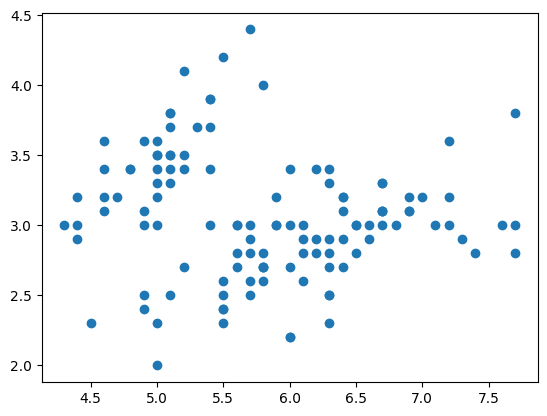

(array([4.6, 5.7, 6.7, 4.8, 4.4, 6.3, 6.4, 5.2, 5. , 5.2, 5.8, 6. , 6.7,
        5.4, 5.4, 5.5, 6.3, 6.4, 6.6, 7.2, 5.7, 7.6, 5.6, 5.1, 7.7, 5.8,
        5.2, 5. , 5.1, 5. , 6.3, 4.8, 5. , 5.1, 5.6, 5.1, 5.7, 7.7, 4.6,
        6.2, 5.7, 5.5, 6. , 5.8, 6. , 5.4, 6.2, 5.5, 5.4, 5. , 6.4, 5. ,
        5. , 5.5, 6.7, 4.9, 5.8, 5. , 5. , 5.9, 5.1, 6.9, 6. , 6.1, 7.7,
        5.5, 4.4, 4.3, 6. , 7.2, 4.6, 5.1, 4.4, 6.3, 6.3, 4.6, 6.8, 6.3,
        4.7, 6.1, 6.5, 6.2, 7. , 6.4, 5.1, 6.9, 5.9, 6.5, 5.7, 5.2, 6.1,
        4.5, 6.6, 5.5, 5.3, 5.6, 7.3, 6.7, 5.1, 4.9, 6.7, 7.2, 4.9, 6.7,
        4.9, 6.9, 7.4, 6.3, 5.7, 6.5, 6.3, 6.4, 5.6, 5.9, 5.4, 6.1, 4.9,
        5.8, 5.8, 7.1]),
 array([6.1, 5.7, 7.7, 6. , 6.8, 5.4, 5.6, 6.9, 6.2, 5.8, 6.5, 4.8, 5.5,
        4.9, 5.1, 6.3, 6.5, 5.6, 5.7, 6.4, 4.7, 6.1, 5. , 6.4, 7.9, 6.7,
        6.7, 6.8, 4.8, 4.8]),
 array([3.6, 4.4, 3.1, 3.4, 3.2, 2.5, 3.2, 3.5, 3.6, 4.1, 2.7, 3.4, 3.1,
        3.9, 3.7, 2.4, 2.8, 3.1, 3. , 3.6, 2.9, 3. , 3. , 3.5, 2.8, 2

In [31]:
def split_data(X : np.ndarray, Y : np.ndarray) -> np.ndarray:
    #X,Y = linear_train_data(check_data())
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    plt.scatter(X_train, Y_train)
    plt.show()
    return X_train, X_test, Y_train, Y_test
X,Y = linear_train_data(check_data())
split_data(X,Y)


In [ ]:
'''
Készíts egy függvényt ami feltanít egy lineaáris regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LinearRegression
függvény neve: train_linear_regression
'''

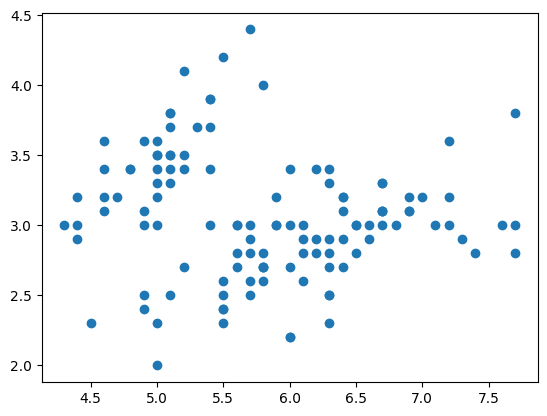

ValueError: Expected 2D array, got 1D array instead:
array=[4.6 5.7 6.7 4.8 4.4 6.3 6.4 5.2 5.  5.2 5.8 6.  6.7 5.4 5.4 5.5 6.3 6.4
 6.6 7.2 5.7 7.6 5.6 5.1 7.7 5.8 5.2 5.  5.1 5.  6.3 4.8 5.  5.1 5.6 5.1
 5.7 7.7 4.6 6.2 5.7 5.5 6.  5.8 6.  5.4 6.2 5.5 5.4 5.  6.4 5.  5.  5.5
 6.7 4.9 5.8 5.  5.  5.9 5.1 6.9 6.  6.1 7.7 5.5 4.4 4.3 6.  7.2 4.6 5.1
 4.4 6.3 6.3 4.6 6.8 6.3 4.7 6.1 6.5 6.2 7.  6.4 5.1 6.9 5.9 6.5 5.7 5.2
 6.1 4.5 6.6 5.5 5.3 5.6 7.3 6.7 5.1 4.9 6.7 7.2 4.9 6.7 4.9 6.9 7.4 6.3
 5.7 6.5 6.3 6.4 5.6 5.9 5.4 6.1 4.9 5.8 5.8 7.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
def train_linear_regression(X_train : np.ndarray, Y_train : np.ndarray) -> LinearRegression:
    lR = LinearRegression() 
    lR = LinearRegression.fit(lR, X = X_train, y = Y_train)
    return lR
X,Y = linear_train_data(check_data())
X_train, X_test, Y_train, Y_test = split_data(X,Y)
train_linear_regression(X_train, Y_train)

In [ ]:
'''
Készíts egy függvényt ami feltanít egy logisztikus regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LogisticRegression
függvény neve: train_logistic_regression
'''

In [ ]:
''' 
Készíts egy függvényt, ami a feltanított modellel predikciót tud végre hajtani.

Egy példa a bemenetre: model, X_test
Egy példa a kimenetre: y_pred
return type: numpy.ndarray
függvény neve: predict
'''

In [ ]:
'''
Készíts egy függvényt, ami vizualizálni tudja a label és a predikciók közötti eltérést.
Használj scatter plotot a diagram elkészítéséhez.

Diagram címe legyen: 'Actual vs Predicted Target Values'
Az x tengely címe legyen: 'Actual'
Az y tengely címe legyen: 'Predicted'

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: scatter plot
return type: matplotlib.figure.Figure
függvény neve: plot_actual_vs_predicted
'''

In [ ]:
''' 
Készíts egy függvényt, ami a Négyzetes hiba (MSE) értékét számolja ki a predikciók és a valós értékek között.

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: mse
return type: float
függvény neve: evaluate_model
'''